<a href="https://www.kaggle.com/code/abdallhwerby/evaluating-different-algorithms-for-regression?scriptVersionId=106446696" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.feature_selection import RFE

In [2]:
data = pd.read_csv (r'../input/car-price-prediction/CarPrice_Assignment.csv') 

In [3]:
plt.rcParams['axes.facecolor'] = 'Beige'

# Exploratory Data Analysis (EDA)

## Take a quick look at the data:

In [4]:
data.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Data types: float64 (8 columns), int64 (8 columns), object (10 columns)


In [6]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Car names are actually written with typos:
#### And the names are actually written with model number, so we split them.

In [8]:
data['CarName'] = data['CarName'].apply(lambda x : x.split()[0])

In [9]:
data['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### Names of models are actually written with Typos, so we correct this.

In [10]:
data['CarName'] = data['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

## Visualizing Data


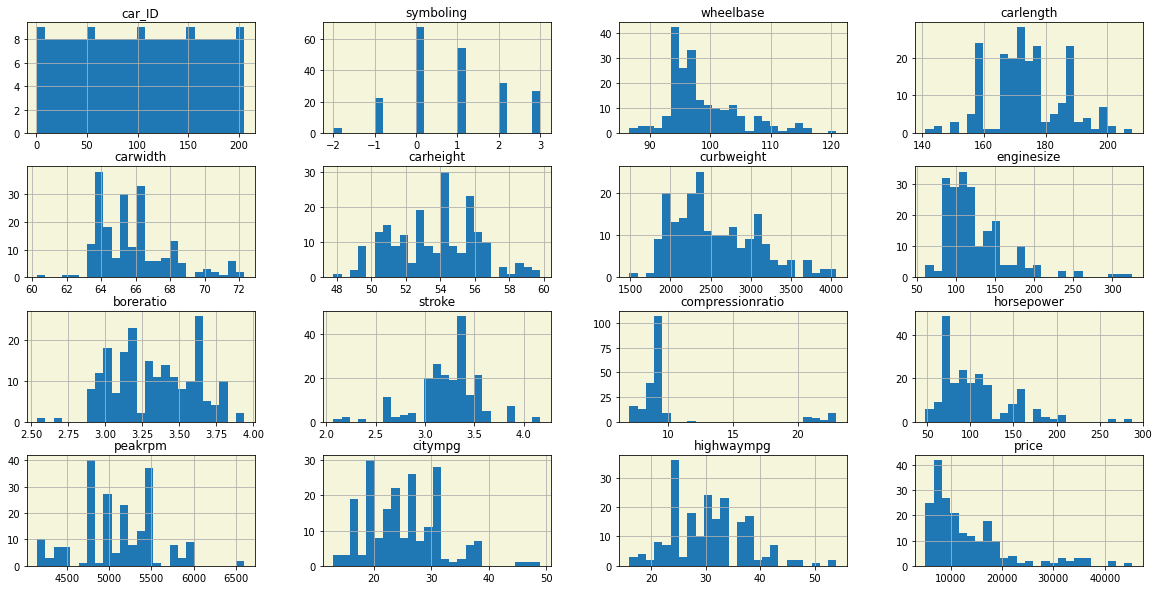

In [11]:
data.hist(bins=25,figsize=(20,10));

### Visualising distribution of car brands:

In [12]:
n=pd.DataFrame(data['CarName'].value_counts()).reset_index().rename(columns={'index':'car_name','CarName': 'count'})

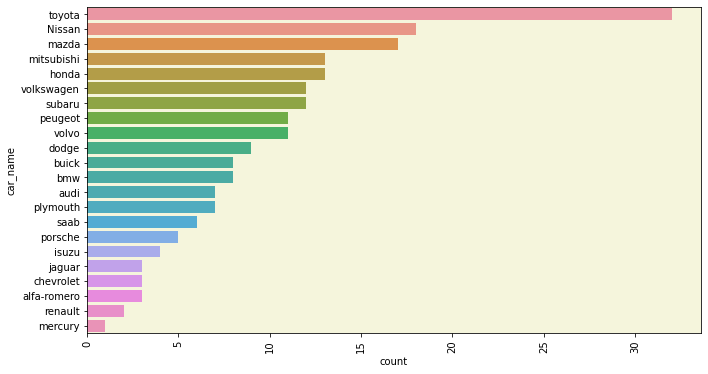

In [13]:
plt.figure(figsize=(11,6))
plot = sns.barplot(y='car_name',x='count',data=n)
plot=plt.setp(plot.get_xticklabels(), rotation=90)

## Distribution of prices: 

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

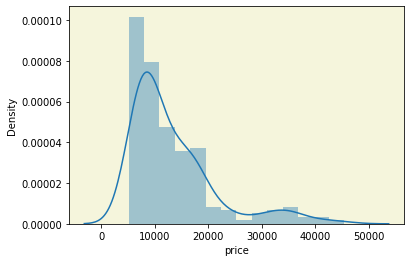

In [14]:
sns.distplot(data['price'],kde=True)

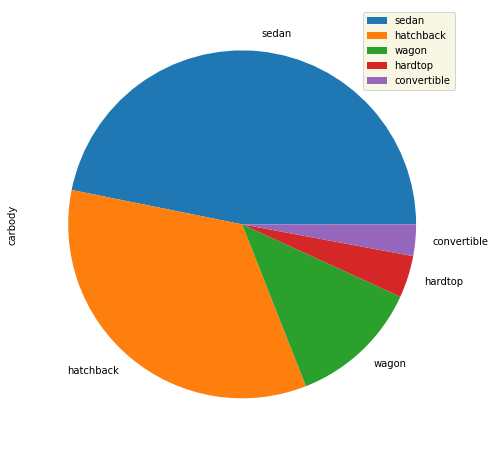

In [15]:
d=pd.DataFrame(data['carbody'].value_counts())
plot = d.plot.pie(y='carbody', figsize=(8, 8))

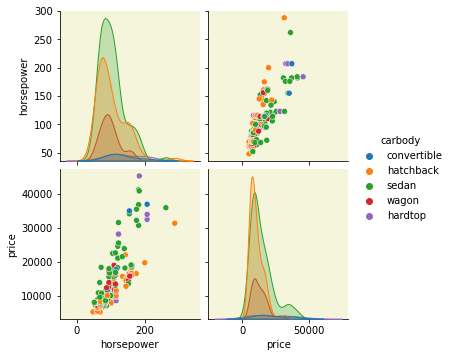

In [16]:
sns.pairplot(data[['horsepower','price','carbody']], hue="carbody");


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Understanding our data:
### We use correlation matrix 

In [18]:
corr_matrix=data.corr()
corr_matrix

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


### But Plotting a correlation plot is actually clearer 

<AxesSubplot:>

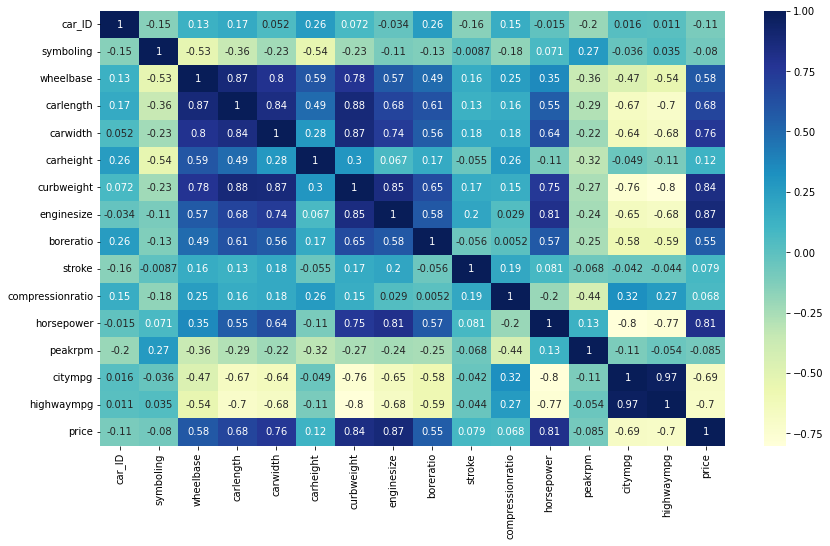

In [19]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

### To understand the correlation plot: it creates a relation between 2 variables and checks if it's proportional(higher than 0.5) or inversely proportional (less than -0.5) , or no relation (close to zero)
#### Understanding the correlation between columns helps you make a better model as the insertion of lesser important columns will actually cause bias or corrupt the model.
### We found this:
- wheelbase has high positive correlation with carlength,carwidth and curbweight
- carlength has high postive correlation with curbweight
- carlength has negative correlation with highwaympg
- carwidth has high postive correlation with curbweight and engine size
- enginesize has high positive correlation with horsepower
- curbweight has high positive correlation with engine size and horse power, negative correlation with highwaympg
- horsepower has negative correlation with citympg and highwaympg
- citympg and highwaympg are highly correlated

## EDA foundings:

- The cars with fueltype as diesel are comparatively expensive than the cars with fueltype as gas.
- All the types of carbody is relatively cheaper as compared to convertible carbody.
- The cars with rear enginelocation are way expensive than cars with front enginelocation.
- The price of car is directly proportional to no. of cylinders in most cases.
- Enginetype ohcv comes into higher price range cars.
- DoorNumber isn't affecting the price much.
- HigerEnd cars seems to have rwd drivewheel

### We drop car_ID

In [20]:
data=data.drop(['car_ID'],axis=1)

## Is there missing data in our dataset?

In [21]:
print(data.isnull().values.any())

False


## Encoding categorical columns:

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [23]:
le = LabelEncoder()
data['CarName']=le.fit_transform(data['CarName'])
data['fueltype']=le.fit_transform(data['fueltype'])
data['aspiration']=le.fit_transform(data['aspiration'])
data['doornumber']=le.fit_transform(data['doornumber'])
data['drivewheel']=le.fit_transform(data['drivewheel'])
data['enginelocation']=le.fit_transform(data['enginelocation'])
data['enginetype']=le.fit_transform(data['enginetype'])
data['cylindernumber']=le.fit_transform(data['cylindernumber'])
data['carbody']=le.fit_transform(data['carbody'])
data['fuelsystem']=le.fit_transform(data['fuelsystem'])

# Outliers:
## We are going to use two methods to deal with oultiers:
## 1) Deletion by scatterplot identification.
## 2) Standardization.

### ______________________________________________

### To look for ouliers we use boxplot 

<AxesSubplot:>

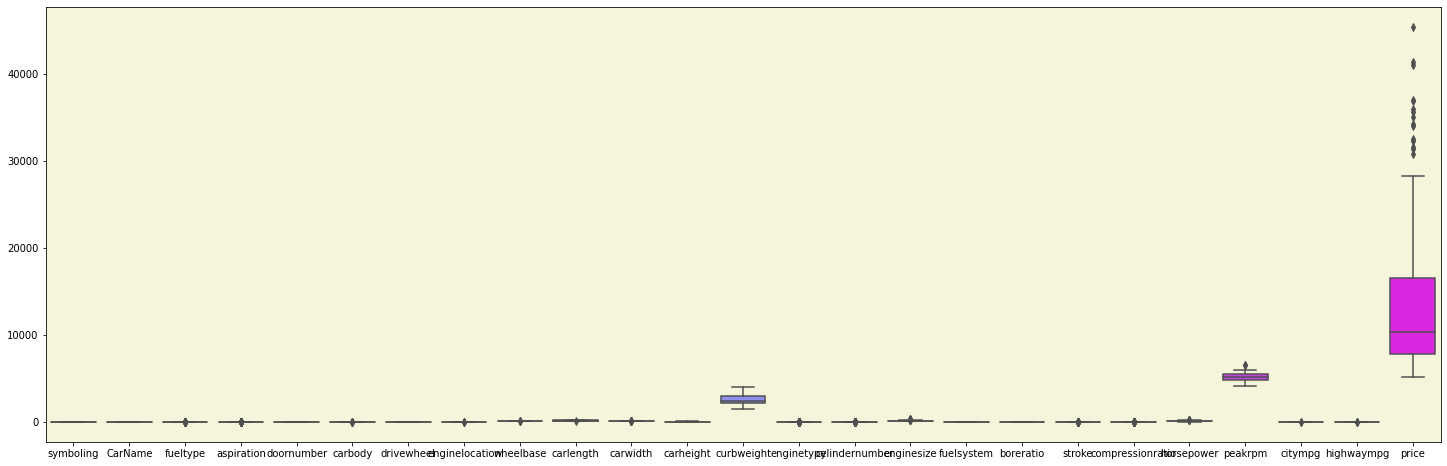

In [24]:
plt.figure(figsize = (25,8))
sns.boxplot(palette = 'cool', data=data)

### A more accurate representation for ouliers is using a scatter plot
#### We make a scatter plot matrix:

In [25]:
#plt.figure(figsize = (20,20)
#sns.set_theme(style = "ticks")
#sns.pairplot(data)

### We make the scatterplot for the numerical columns only:

<Figure size 1440x1440 with 0 Axes>

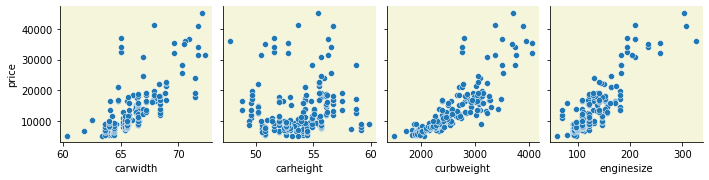

In [26]:
plt.figure(figsize = (20,20))
sns.pairplot(data = data , x_vars = ['carwidth', 'carheight', 'curbweight', 'enginesize'] , y_vars = ['price'])

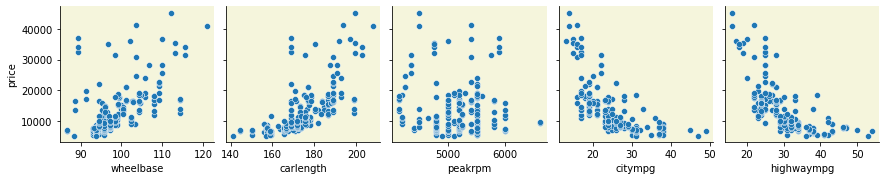

In [27]:
sns.pairplot(data = data , x_vars = ['wheelbase','carlength','peakrpm', 'citympg', 'highwaympg'] , y_vars = ['price'])


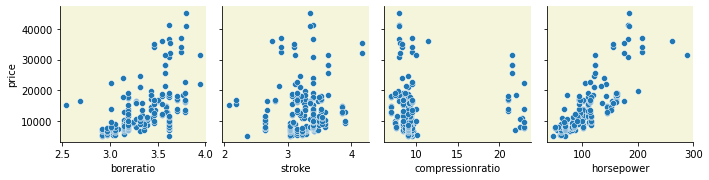

In [28]:
sns.pairplot(data = data , x_vars = ['boreratio', 'stroke', 'compressionratio', 'horsepower'] , y_vars = ['price'])

## 1) Deletion of outliers:

In [29]:
data = data.drop(data[data['price']>35000].index)
#data = data.drop(data[data['carwidth']>70].index)
#data = data.drop(data[data['carheight']>58].index)
#data = data.drop(data[data['curbweight']>3500].index)
#data = data.drop(data[data['enginesize']>250].index)
#data = data.drop(data[data['wheelbase']>115].index)
#data = data.drop(data[data['carlength']>200].index)
data = data.drop(data[data['peakrpm']>6000].index)
#data = data.drop(data[data['citympg']>40].index)
data = data.drop(data[data['highwaympg']>40].index)
#data = data.drop(data[data['boreratio']>4].index)
#data = data.drop(data[data['stroke']>4].index)
data = data.drop(data[data['compressionratio']>20].index)
#data = data.drop(data[data['horsepower']>250].index)

####  We only deleted the outliers that could actually corrupt data:

## VIF:

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=data
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) 
for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

symboling              3.251172
CarName                1.707915
fueltype            7569.298361
aspiration             3.707902
doornumber             2.977815
carbody                2.712777
drivewheel             2.651817
enginelocation         2.141466
wheelbase              8.888677
carlength              8.835199
carwidth               6.560362
carheight              2.934085
curbweight            14.724193
enginetype             1.761523
cylindernumber         2.902366
enginesize            11.827828
fuelsystem             2.963498
boreratio              2.250364
stroke                 1.748981
compressionratio       3.881356
horsepower            12.992091
peakrpm                2.197943
citympg               32.174525
highwaympg            21.579851
price                  8.013516
dtype: float64

## Treatment of multicolinearity:

In [31]:
def MC_remover(data):
    vif=pd.Series([variance_inflation_factor(data.values,i)for i in range(data.shape[1])],index=data.columns)
    if vif.max()>5:
        print(vif[vif == vif.max()].index[0],'has been removed')
        data = data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print("No multicollinearity present anymore")
        return data

In [32]:
for i in range(10):
    vif_data=MC_remover(vif_data)
vif_data.head()

fueltype has been removed
carwidth has been removed
wheelbase has been removed
carlength has been removed
carheight has been removed
citympg has been removed
compressionratio has been removed
curbweight has been removed
boreratio has been removed
peakrpm has been removed


,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,enginesize,fuelsystem,stroke,horsepower,highwaympg,price
0,3,1,0,1,0,2,0,0,2,130,5,2.68,111,27,13495.0
1,3,1,0,1,0,2,0,0,2,130,5,2.68,111,27,16500.0
2,1,1,0,1,2,2,0,5,3,152,5,3.47,154,26,16500.0
3,2,2,0,0,3,1,0,3,2,109,5,3.40,102,30,13950.0
4,2,2,0,0,3,0,0,3,1,136,5,3.40,115,22,17450.0


### calculating VIF for remaining columns

In [33]:
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF,len(vif_data.columns)

(symboling           3.529453
 CarName             4.587837
 aspiration          2.217230
 doornumber          4.825863
 carbody            20.360331
 drivewheel         13.355134
 enginelocation      1.504519
 enginetype         12.665826
 cylindernumber     16.987476
 enginesize         84.984659
 fuelsystem          9.134872
 stroke            116.430160
 horsepower         64.139575
 highwaympg         58.473873
 price              28.331285
 dtype: float64,
 15)

# Splitting data:

In [34]:
reg = linear_model.LinearRegression()

### Rearragning columns:
- No need because price is the last column.

### To create the proper comparison we drop house value column from x and make it y


In [35]:
x = data.drop(['price'] , axis = 1).values
y= data['price' ].values

In [36]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state=42)


In [37]:
x_train.shape

(123, 24)

In [38]:
y_train.shape

(123,)

# Scaling
### Make sure all data aren't categorical

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         164 non-null    int64  
 1   CarName           164 non-null    int64  
 2   fueltype          164 non-null    int64  
 3   aspiration        164 non-null    int64  
 4   doornumber        164 non-null    int64  
 5   carbody           164 non-null    int64  
 6   drivewheel        164 non-null    int64  
 7   enginelocation    164 non-null    int64  
 8   wheelbase         164 non-null    float64
 9   carlength         164 non-null    float64
 10  carwidth          164 non-null    float64
 11  carheight         164 non-null    float64
 12  curbweight        164 non-null    int64  
 13  enginetype        164 non-null    int64  
 14  cylindernumber    164 non-null    int64  
 15  enginesize        164 non-null    int64  
 16  fuelsystem        164 non-null    int64  
 1

In [40]:
from sklearn.preprocessing import RobustScaler

#### Robust scaler reduces the effect of ouliers


In [41]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

In [42]:
x_train.shape

(123, 24)

In [43]:
## copy data
datal = data.copy()

# Linear regression:

In [44]:
reg.fit(x_train , y_train)
reg.score(x_train , y_train)


0.9039089292048242

In [45]:
reg.score(x_test , y_test)

0.7312237219437406

In [46]:
reg.coef_

array([ 6.87329547e+02, -1.24034092e+03,  7.04858394e-12,  1.54271752e+03,
       -1.39576533e+03, -4.71220549e+02,  1.36478746e+03,  1.40609600e+04,
        1.84096955e+03, -1.30671666e+03,  6.95911354e+02,  1.13290306e+01,
        2.27450421e+03,  2.43205686e+01, -1.14569848e+03,  8.71596464e+02,
       -1.82407398e+02, -4.75912430e+02, -2.26060732e+02,  1.52046583e+03,
        9.47823885e+02, -2.76100710e+02, -3.63820722e+03, -2.25297247e+02])

In [47]:
pd.DataFrame(reg.coef_ , datal.columns[:-1] ,  columns=['Coeficient'])

,Coeficient
symboling,6.873295e+02
CarName,-1.240341e+03
fueltype,7.048584e-12
aspiration,1.542718e+03
doornumber,-1.395765e+03
carbody,-4.712205e+02
drivewheel,1.364787e+03
enginelocation,1.406096e+04
wheelbase,1.840970e+03
carlength,-1.306717e+03


In [48]:
y_pred =reg.predict(x_test)
datal = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
datal.head(10)

,Y_test,Y_pred
0,11199.0,13457.334961
1,11259.0,8363.657763
2,8238.0,6528.127993
3,6189.0,5799.054918
4,12764.0,13704.327068
5,7895.0,7763.936014
6,16515.0,14696.144922
7,11245.0,9828.958769
8,9895.0,8695.635598
9,15750.0,17220.500143


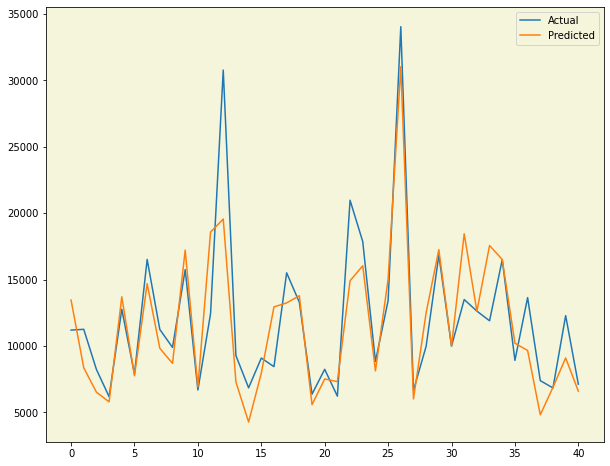

In [49]:
plt.figure(figsize=(10,8))
plt.plot(datal[:50])
plt.legend(["Actual" , "Predicted"])

## Other regression algortithms:

## Decision Tree Regression:

In [50]:
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(x_train,y_train)
y_train_pred = dt_regressor.predict(x_train)
y_test_pred = dt_regressor.predict(x_test)
dt_regressor.score(x_test,y_test)

0.48338692167288055

## Random forest Regression:

In [51]:
Rf = RandomForestRegressor(n_estimators = 15,
                              criterion = 'mse',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(x_train,y_train)
Rf_train_pred = Rf.predict(x_train)
Rf_test_pred = Rf.predict(x_test)


r2_score(y_test,Rf_test_pred)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


0.5074661832167695

In [52]:
y_pred =reg.predict(x_test)
datal = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
datal.head(10)

,Y_test,Y_pred
0,11199.0,13457.334961
1,11259.0,8363.657763
2,8238.0,6528.127993
3,6189.0,5799.054918
4,12764.0,13704.327068
5,7895.0,7763.936014
6,16515.0,14696.144922
7,11245.0,9828.958769
8,9895.0,8695.635598
9,15750.0,17220.500143


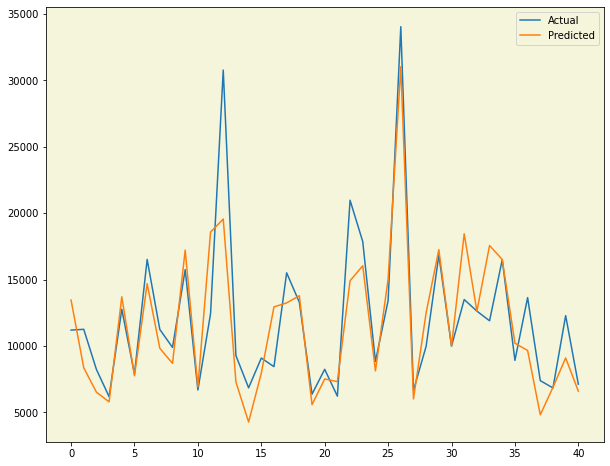

In [53]:
plt.figure(figsize=(10,8))
plt.plot(datal[:50])
plt.legend(["Actual" , "Predicted"])

### Ridge regression:

In [54]:
reg = linear_model.Ridge(  alpha=0.9)
reg.fit(x_train , y_train)
reg.fit(x_train , y_train)
reg.score(x_train , y_train)

0.8931960791359921

In [55]:
y_pred =reg.predict(x_test)
datal = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
datal.head(10)

,Y_test,Y_pred
0,11199.0,13248.914044
1,11259.0,8531.447310
2,8238.0,6524.933839
3,6189.0,5690.636456
4,12764.0,13669.716599
5,7895.0,8065.304676
6,16515.0,14941.527950
7,11245.0,9689.665318
8,9895.0,8324.103292
9,15750.0,17097.877505


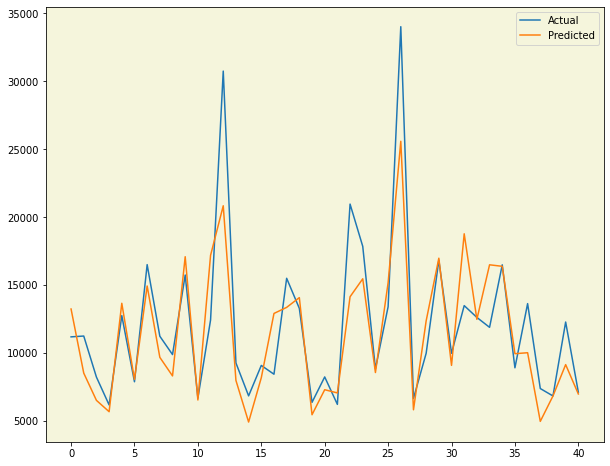

In [56]:
plt.figure(figsize=(10,8))
plt.plot(datal[:50])
plt.legend(["Actual" , "Predicted"])

### Lasso regression:

In [57]:
reg = linear_model.Lasso(alpha=0.9)
reg.fit(x_train,y_train)
reg.score(x_train , y_train)


0.903897428328444

In [58]:
reg.score(x_test , y_test)


0.7327427430742162

In [59]:
y_pred =reg.predict(x_test)
datal = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
datal.head(10)

,Y_test,Y_pred
0,11199.0,13441.346732
1,11259.0,8378.604547
2,8238.0,6518.259469
3,6189.0,5798.333344
4,12764.0,13690.265705
5,7895.0,7793.483738
6,16515.0,14716.575805
7,11245.0,9820.648224
8,9895.0,8714.558915
9,15750.0,17233.246235


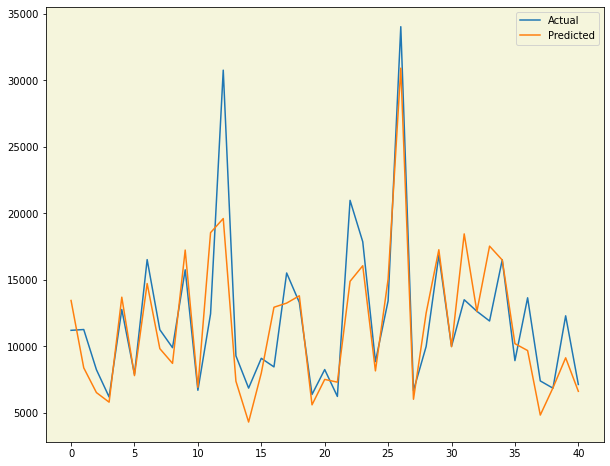

In [60]:
plt.figure(figsize=(10,8))
plt.plot(datal[:50])
plt.legend(["Actual" , "Predicted"])

In [61]:
reg_score = r2_score(y_test , y_pred)
p = len(x_train[0])
n = len(y_train)
adj_R1 = 1-(1-reg_score)*(n-1)/(n-p-1)
adj_R1

0.667291986276065

In [62]:
adj_R1< reg_score

True

# Evaluation:

In [63]:
def run_experiment(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

## Linear regression

In [64]:
model = LinearRegression()
run_experiment(model)

R^2 :  0.7312237219437406
MAE : 2107.4739557805565
RMSE: 3043.2504426149985


## Lasso regression

In [65]:
model = linear_model.Lasso()
run_experiment(model)

R^2 :  0.7329084192640009
MAE : 2099.1128563723996
RMSE: 3033.697860154065


## Ridge regression

In [66]:
model = linear_model.Ridge()
run_experiment(model)

R^2 :  0.720918674955499
MAE : 2135.9867364345546
RMSE: 3101.0417564052436


## Random forest regression

In [67]:
model = RandomForestRegressor()
run_experiment(model)

R^2 :  0.5834287658946298
MAE : 1974.662166666666
RMSE: 3788.6707448969496


### Decision Tree Regression

In [68]:
model = DecisionTreeRegressor()
run_experiment(model)

R^2 :  0.5087311934895125
MAE : 2250.3577317073173
RMSE: 4114.355561611459


### We can use Another regression evaluation model (SGD regressor)

In [69]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
run_experiment(model)

R^2 :  0.702672311360322
MAE : 2190.4839941946534
RMSE: 3200.8100605088785


## Explanation:
- Lasso gives the highest R square.
- Random forest gives the least error.

## Accuracy, percision and Recall:

In [70]:
def run_experiment(model):
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    plot_confusion_matrix(model, x_test, y_test, cmap='GnBu')
    plt.show()
    print('Precision: %.3f' % precision_score(y_test, y_pred))
    print('Recall: %.3f' % recall_score(y_test, y_pred))
    print('F1: %.3f' % f1_score(y_test, y_pred))
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))